In [ ]:
# Import Library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

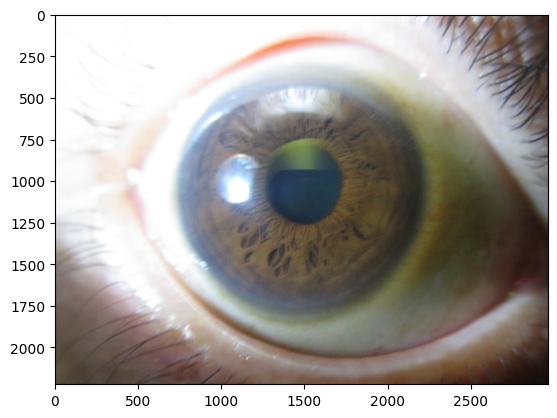

In [ ]:
# Menampilkan citra iris mata
image_path = '/content/11.JPG'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(2222, 2962, 3)

(260, 360, 3)
3


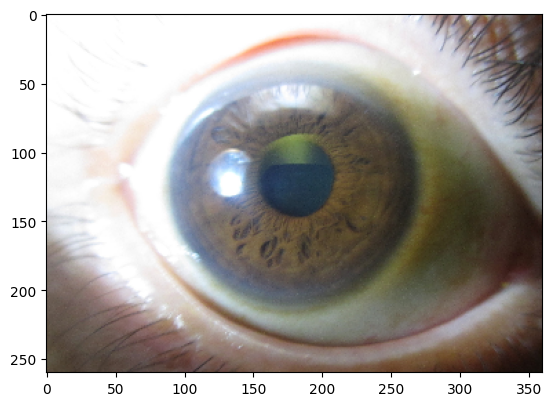

In [ ]:
# Resize citra
resized_image = cv2.resize(img, (360, 260))

print(resized_image.shape)
print(resized_image.ndim)

plt.imshow(resized_image)
plt.show()

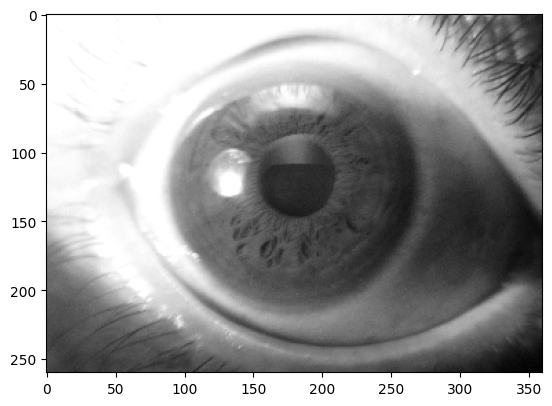

In [ ]:
# Konversi grayscale
img_Gray = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
plt.imshow(img_Gray, cmap='gray')
plt.show()

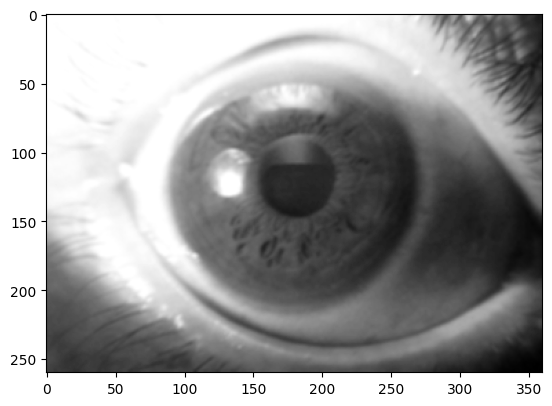

In [ ]:
# Gaussian Blur
img_Gaussian = cv2.GaussianBlur(img_Gray, (3, 3), 1.4)
plt.imshow(img_Gaussian, cmap='gray')
plt.show()

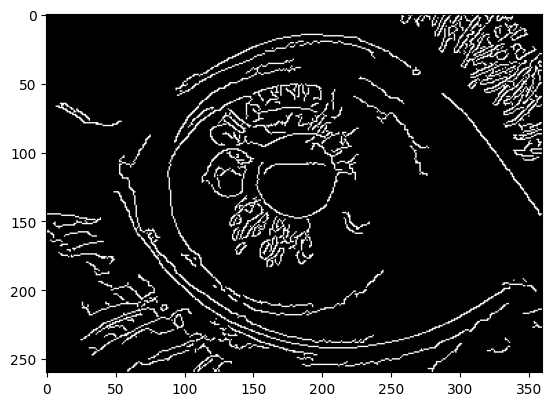

In [ ]:
# Deteksi Tepi Canny
canny_edge = cv2.Canny(img_Gaussian, 20, 80)
plt.imshow(canny_edge, cmap='gray')
plt.show()

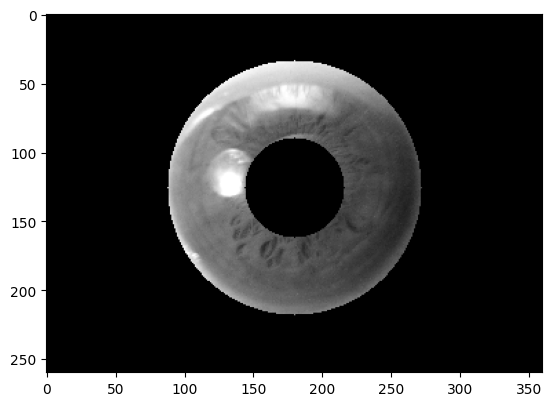

In [ ]:
# Deteksi lingkaran iris dan pupil dengan Hough Circle Transform
circles = cv2.HoughCircles(canny_edge, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=30, param2=15, minRadius=10, maxRadius=100)

# Mendeteksi lingkaran
if circles is not None:
    circles = np.uint16(np.around(circles))
    circle = circles[0, 0, :]
    center_x, center_y, radius = circle[0], circle[1], circle[2]

    # Membuat mask untuk lingkaran iris
    mask_iris = np.zeros_like(canny_edge)
    cv2.circle(mask_iris, (center_x, center_y), radius, 255, thickness=-1)

    # Membuat mask untuk lingkaran pupil (dengan radius lebih kecil)
    radius_pupil = int(radius * 0.4)
    cv2.circle(mask_iris, (center_x, center_y), radius_pupil, 0, thickness=-1)

    # Memotong area iris
    iris_crop = cv2.bitwise_and(img_Gray, img_Gray, mask=mask_iris)
    plt.imshow(iris_crop, cmap='gray')

    plt.show()
else:
    print("Tidak dapat menemukan lingkaran iris.")

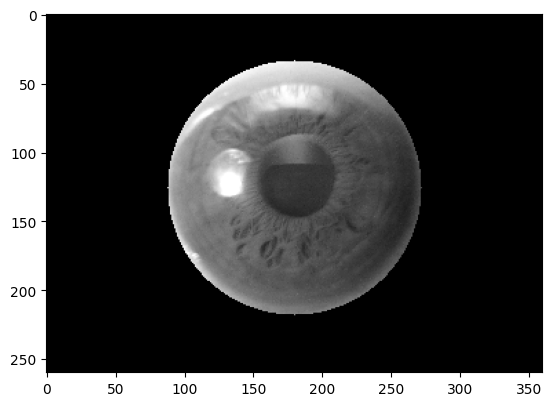

In [ ]:
# Deteksi lingkaran iris dengan Hough Circle Transform
circles = cv2.HoughCircles(canny_edge, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=30, param2=15, minRadius=10, maxRadius=100)

# Mendeteksi lingkaran
if circles is not None:
    circles = np.uint16(np.around(circles))
    # Memilih lingkaran pertama sebagai iris

    circle = circles[0, 0, :]
    center_x, center_y, radius = circle[0], circle[1], circle[2]
    # Membuat mask untuk lingkaran
    mask = np.zeros_like(canny_edge)
    cv2.circle(mask, (center_x, center_y), radius, 255, thickness=-1)

    # Memotong area iris
    iris_crop = cv2.bitwise_and(img_Gray, mask)
    plt.imshow(iris_crop, cmap='gray')
    plt.show()
else:
    print("Tidak dapat menemukan lingkaran iris.")

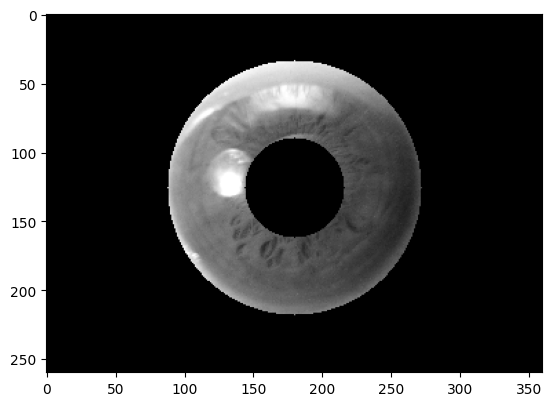

In [ ]:
# Deteksi lingkaran iris dan pupil dengan Hough Circle Transform
circles = cv2.HoughCircles(canny_edge, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=30, param2=15, minRadius=10, maxRadius=100)

# Mendeteksi lingkaran
if circles is not None:
    circles = np.uint16(np.around(circles))
    circle = circles[0, 0, :]
    center_x, center_y, radius = circle[0], circle[1], circle[2]

    # Membuat mask untuk lingkaran iris
    mask_iris = np.zeros_like(canny_edge)
    cv2.circle(mask_iris, (center_x, center_y), radius, 255, thickness=-1)

    # Membuat mask untuk lingkaran pupil (dengan radius lebih kecil)
    radius_pupil = int(radius * 0.4)
    cv2.circle(mask_iris, (center_x, center_y), radius_pupil, 0, thickness=-1)

    # Memotong area iris
    iris_crop = cv2.bitwise_and(img_Gray, img_Gray, mask=mask_iris)
    plt.imshow(iris_crop, cmap='gray')

    plt.show()
else:
    print("Tidak dapat menemukan lingkaran iris.")

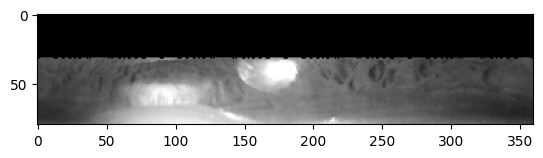

In [ ]:
# Transformasi citra annular ke polar
def polar_transform(image, center, radius, width, height):
    polar_image = np.zeros((height, width), dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            # Mengubah perhitungan nilai theta menjadi berlawanan arah jarum jam
            theta = 2 * np.pi * (1 - x / width)
            r = radius * y / height
            px = center[0] + int(r * np.cos(theta))
            py = center[1] + int(r * np.sin(theta))
            if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                polar_image[y, x] = image[py, px]
    return polar_image

# Menemukan center dari citra iris
iris_center = (center_x, center_y)
iris_radius = radius

# Size citra polar
polar_width = 360
polar_height = 80
polar_image = polar_transform(iris_crop, iris_center, iris_radius, polar_width, polar_height)

plt.imshow(polar_image, cmap='gray')
plt.show()

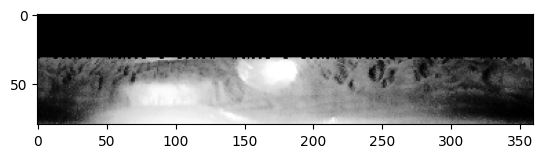

In [ ]:
# Meningkatkan kontras dengan histogram equalization
equalized_img = cv2.equalizeHist(polar_image)
plt.imshow(equalized_img, cmap='gray')

plt.show()

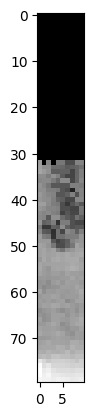

In [ ]:
# Segmentasi area liver
start_pixel = 215
end_pixel = 225
area_liver_polar = equalized_img[:, start_pixel:end_pixel]

plt.imshow(area_liver_polar, cmap='gray')
plt.show()

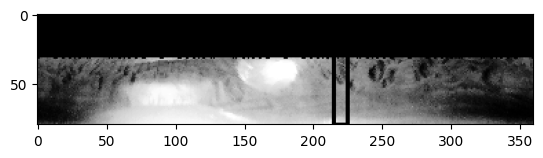

In [ ]:
# Menandai area liver dengan kotak hitam
segmented_image = equalized_img.copy()
cv2.rectangle(segmented_image, (start_pixel, 0), (end_pixel, polar_height), (0, 0, 255), 2)

plt.imshow(segmented_image, cmap='gray')
plt.show()

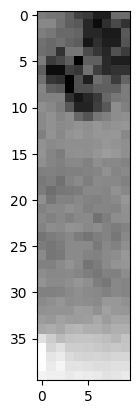

In [ ]:
# Menentukan area cropping
y_start = 40
y_end = 100
cropped_image = area_liver_polar[y_start:y_end]

plt.imshow(cropped_image, cmap='gray')
plt.show()

(150, 150)
2


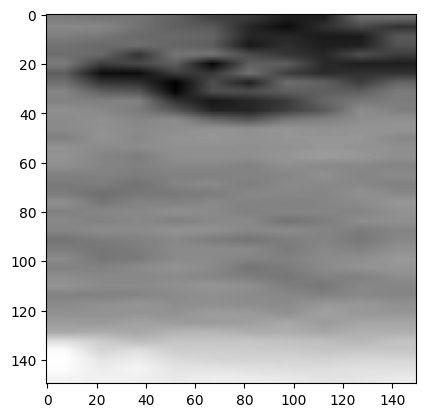

In [ ]:
# Me-resize citra
resized_image_plus = cv2.resize(cropped_image, (150, 150))

print(resized_image_plus.shape) #menampilkan ukuran citra
print(resized_image_plus.ndim) #menampilkan dimensi citra

plt.imshow(resized_image_plus, cmap='gray')
plt.show()

In [ ]:
output_lingk_path = '/content/liver_irisnorm_11.jpg'
cv2.imwrite(output_lingk_path, resized_image_plus)

True